In [6]:
import pandas as pd
import numpy as np
import pyecharts as pes
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

data = pd.read_excel("appendix.xlsx","男胎检测数据")
data

,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,Y染色体浓度,X染色体浓度,13号染色体的GC含量,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康
0,1,A001,31,160.0,72.00,2023-02-01 00:00:00,自然受孕,20230429,1,11w+6,...,0.025936,0.038061,0.377069,0.389803,0.399399,0.027484,NaN,1,0,是
1,2,A001,31,160.0,73.00,2023-02-01 00:00:00,自然受孕,20230531,2,15w+6,...,0.034887,0.059572,0.371542,0.384771,0.391706,0.019617,NaN,1,0,是
2,3,A001,31,160.0,73.00,2023-02-01 00:00:00,自然受孕,20230625,3,20w+1,...,0.066171,0.075995,0.377449,0.390582,0.399480,0.022312,NaN,1,0,是
3,4,A001,31,160.0,74.00,2023-02-01 00:00:00,自然受孕,20230716,4,22w+6,...,0.061192,0.052305,0.375613,0.389251,0.397212,0.023280,NaN,1,0,是
4,5,A002,32,149.0,74.00,2023-11-09 00:00:00,自然受孕,20240219,1,13w+6,...,0.059230,0.059708,0.380260,0.393618,0.404868,0.024212,NaN,2,1,否
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,1078,A266,30,159.0,83.35,2022-12-29,自然受孕,2023-05-02 00:00:00,4,17w+5,...,0.099052,0.056686,0.376861,0.389914,0.397090,0.017951,T18,1,0,是
1078,1079,A267,28,155.0,73.76,2023-02-25,自然受孕,2023-05-17 00:00:00,1,11w+4,...,0.098706,0.023663,0.377597,0.387901,0.404293,0.022549,T21,1,0,是
1079,1080,A267,28,155.0,74.06,2023-02-25,自然受孕,2023-05-24 00:00:00,2,12w+4,...,0.102088,0.080264,0.379041,0.391748,0.400433,0.021330,NaN,1,0,是
1080,1081,A267,28,155.0,74.74,2023-02-25,自然受孕,2023-05-31 00:00:00,3,13w+4,...,0.109855,0.074050,0.379107,0.388544,0.401030,0.022013,NaN,1,0,是


In [10]:
# 数据处理
# 异常值处理
# GC含量在40%-60%
data["GC值正常"] = data["GC含量"].between(0.4, 0.6, inclusive='both')

# Y染色体浓度达到0.4
data["Y染色体浓度正常"] = data["Y染色体浓度"] >= 0.4

# 新增怀孕时间（天）列
def week2day(week: str):
    try:
        w = 0
        d = 0
        if '+' in week:
            WAD = week.split("+")
            w = int(WAD[0].strip("w").strip())
            d = int(WAD[1].strip("d").strip())
        elif 'w' in week:
            w = int(week.strip('w').strip())
            d = 0
        elif 'd' in week:
            w = 0
            d = int(week.strip('d').strip())
        else:
            # 如果格式不符合预期，返回NaN或默认值
            return pd.NaT
        return 7*w+d
    except (ValueError, AttributeError):
        # 处理转换错误
        return pd.NaT
    
    
data["怀孕时间"] = data["检测孕周"].apply(week2day)
data

,序号,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,...,18号染色体的GC含量,21号染色体的GC含量,被过滤掉读段数的比例,染色体的非整倍体,怀孕次数,生产次数,胎儿是否健康,GC值正常,Y染色体浓度正常,怀孕时间
0,1,A001,31,160.0,72.00,2023-02-01 00:00:00,自然受孕,20230429,1,11w+6,...,0.389803,0.399399,0.027484,NaN,1,0,是,False,False,83
1,2,A001,31,160.0,73.00,2023-02-01 00:00:00,自然受孕,20230531,2,15w+6,...,0.384771,0.391706,0.019617,NaN,1,0,是,False,False,111
2,3,A001,31,160.0,73.00,2023-02-01 00:00:00,自然受孕,20230625,3,20w+1,...,0.390582,0.399480,0.022312,NaN,1,0,是,False,False,141
3,4,A001,31,160.0,74.00,2023-02-01 00:00:00,自然受孕,20230716,4,22w+6,...,0.389251,0.397212,0.023280,NaN,1,0,是,False,False,160
4,5,A002,32,149.0,74.00,2023-11-09 00:00:00,自然受孕,20240219,1,13w+6,...,0.393618,0.404868,0.024212,NaN,2,1,否,True,False,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,1078,A266,30,159.0,83.35,2022-12-29,自然受孕,2023-05-02 00:00:00,4,17w+5,...,0.389914,0.397090,0.017951,T18,1,0,是,True,False,124
1078,1079,A267,28,155.0,73.76,2023-02-25,自然受孕,2023-05-17 00:00:00,1,11w+4,...,0.387901,0.404293,0.022549,T21,1,0,是,True,False,81
1079,1080,A267,28,155.0,74.06,2023-02-25,自然受孕,2023-05-24 00:00:00,2,12w+4,...,0.391748,0.400433,0.021330,NaN,1,0,是,True,False,88
1080,1081,A267,28,155.0,74.74,2023-02-25,自然受孕,2023-05-31 00:00:00,3,13w+4,...,0.388544,0.401030,0.022013,NaN,1,0,是,False,False,95


In [7]:
# 绘制两个变量关系及其fit的函数
def plot_scatter(data: pd.DataFrame, str1, str2):
    plt.figure(figsize=(10, 8))

    #Plot data and fit
    sns.lmplot(data, x=str1, y=str2, scatter_kws={'color': 'gray'}, line_kws={'color': 'lightgreen'})
    
    # 设置中文字体支持
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
    plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
    plt.xlabel(str1)
    plt.ylabel(str2)

<Figure size 1000x800 with 0 Axes>

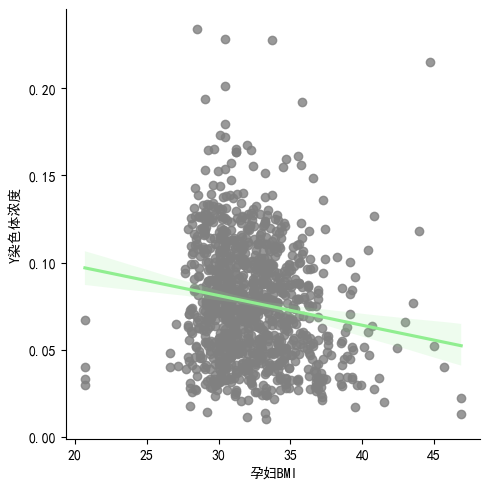

In [9]:
plot_scatter(data,"孕妇BMI", "Y染色体浓度")